In [1]:
#Code here 
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fraud Detection Analysis/creditcard-1.csv')
# print(data.isnull().any().sum())

In [3]:
print(data.columns)
print(data.shape)

Index(['TIME', 'GENDER', 'INCOME', 'OCCUPATION', 'REGIONAL_RATING',
       'FAMILY_INCOME', 'LOANS', 'AGE', 'LATTITUDE', 'LONGITUDE', 'HOUSE_TYPE',
       'NO_CARS', 'CAR_AGE', 'CONTACT_NO', 'ORG_TYPE', 'AVG_COMM_AREA',
       'MONTH_EXP', 'ANNUAL_EXP', 'LAND_AREA', 'LIVING_AREA', 'NONLIVING_AREA',
       'DECOR', 'FLOORS_MAX', 'SOCIAL_INDEX', 'FLAG_DOCUMENT_1',
       'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'AMOUNT', 'CLASS'],
      dtype='object')
(284807, 31)


In [4]:
print(data.describe())

                TIME        GENDER        INCOME    OCCUPATION  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00   

       REGIONAL_RATING  FAMILY_INCOME         LOANS           AGE  \
count     2.848070e+05   2.848070e+05  2.848070e+05  2.848070e+05   
mean      2.074095e-15   9.604066e-16  1.487313e-15 -5.556467e-16   
std       1.415869e+00   1.380247e+00  1.332271e+00  1.237094e+00   
min      -5.683171e+00  -1.137433e+02 -2.616051e+01 -4.355724e+01   
25%      -8.486401e-01  -6.915971e-01 -7.682956e-01 -5.54075

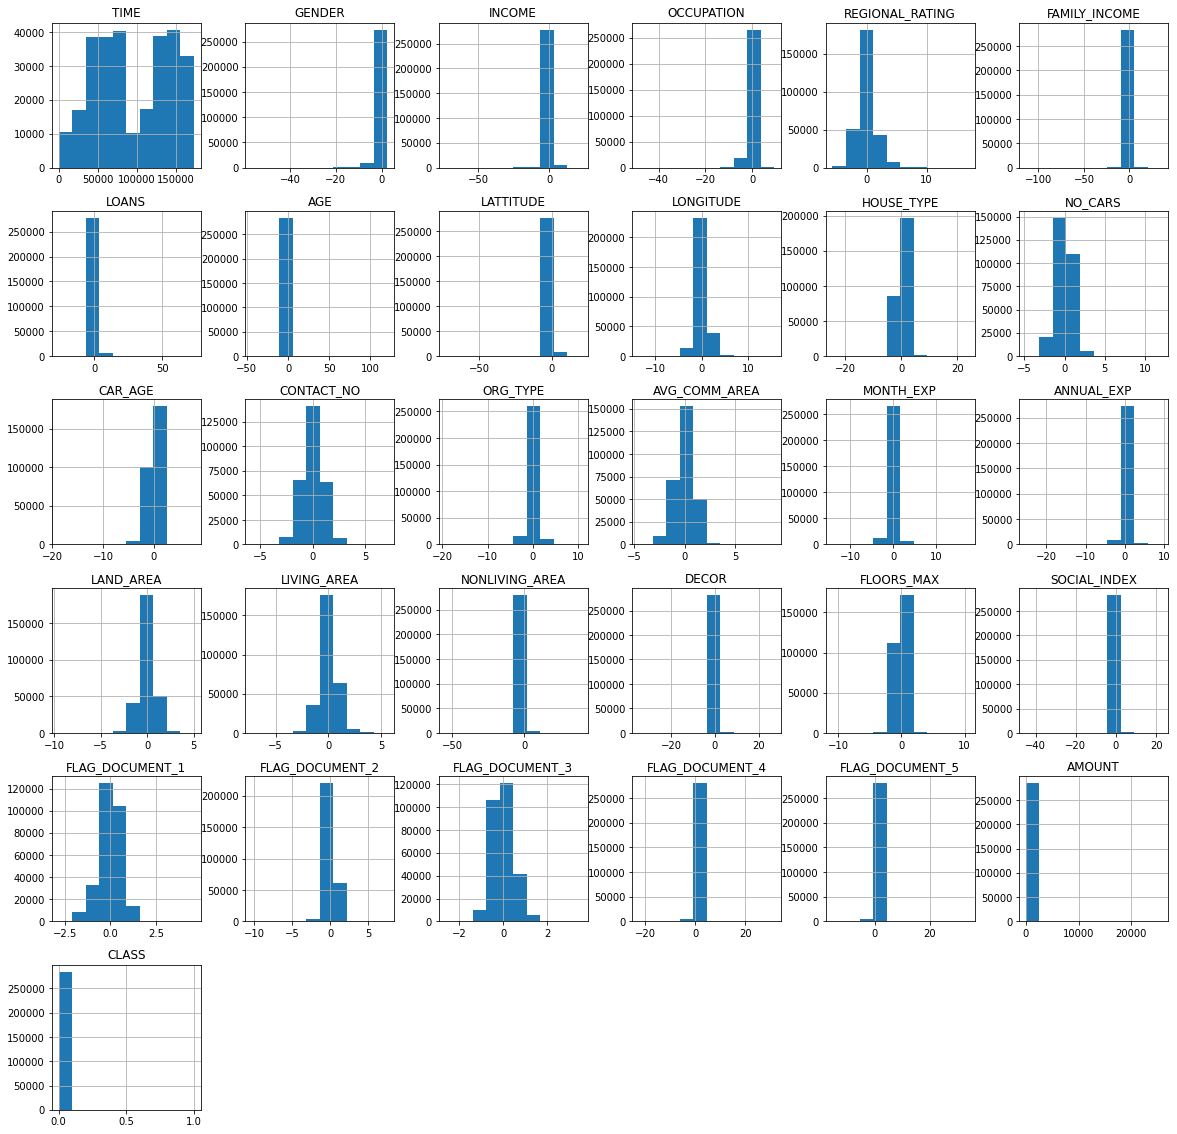

In [5]:
data.hist(figsize=(20,20))
plt.show()

In [6]:
fraud = data[data['CLASS'] == 1]
valid = data[data['CLASS'] == 0]

outlier_frac = len(fraud)/float(len(valid))

print(outlier_frac)


print(len(fraud))
print(len(valid))

print(fraud)


0.0017304750013189597
492
284315
            TIME    GENDER    INCOME  OCCUPATION  REGIONAL_RATING  \
541        406.0 -2.312227  1.951992   -1.609851         3.997906   
623        472.0 -3.043541 -3.157307    1.088463         2.288644   
4920      4462.0 -2.303350  1.759247   -0.359745         2.330243   
6108      6986.0 -4.397974  1.358367   -2.592844         2.679787   
6329      7519.0  1.234235  3.019740   -4.304597         4.732795   
...          ...       ...       ...         ...              ...   
279863  169142.0 -1.927883  1.125653   -4.518331         1.749293   
280143  169347.0  1.378559  1.289381   -5.004247         1.411850   
280149  169351.0 -0.676143  1.126366   -2.213700         0.468308   
281144  169966.0 -3.113832  0.585864   -5.399730         1.817092   
281674  170348.0  1.991976  0.158476   -2.583441         0.408670   

        FAMILY_INCOME     LOANS       AGE  LATTITUDE  LONGITUDE  ...  \
541         -0.522188 -1.426545 -2.537387   1.391657  -2.770089  .

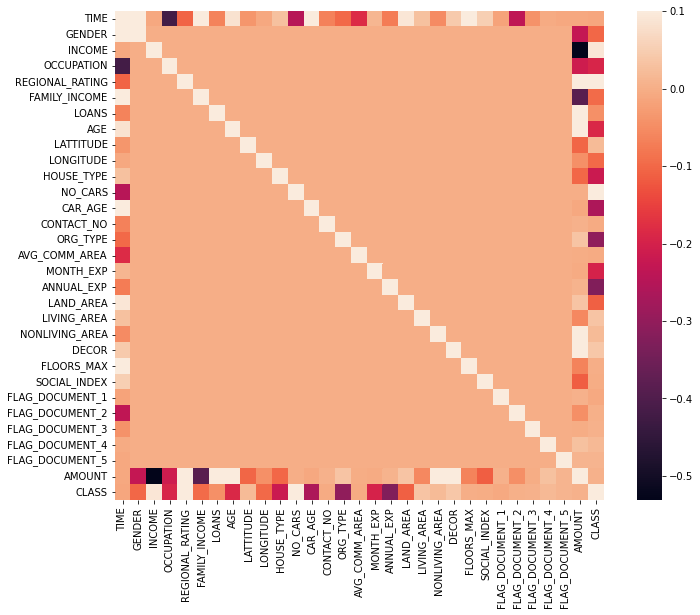

In [7]:
corrmat = data.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmat, vmax = .1, square = True)
plt.show()

In [8]:
columns = data.columns.tolist()

columns = [c  for c in columns if c not in ["CLASS"]]

#anomaly detection, unsupervised
target = "CLASS"

X = data[columns]
Y = data[target]

print(X.shape)
print(Y.shape)


(284807, 30)
(284807,)


In [9]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest #returns anomaly score randomly selecting a feature
from sklearn.neighbors import LocalOutlierFactor


state = 1

#outlier detection
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination = outlier_frac,
                                        random_state = state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors = 20,
        contamination = outlier_frac)
       
}


In [10]:
bool_series = pd.isnull(data["CLASS"]) 
    
# filtering data 
# displaying data only with Gender = NaN 
data[bool_series] 

,TIME,GENDER,INCOME,OCCUPATION,REGIONAL_RATING,FAMILY_INCOME,LOANS,AGE,LATTITUDE,LONGITUDE,...,DECOR,FLOORS_MAX,SOCIAL_INDEX,FLAG_DOCUMENT_1,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,AMOUNT,CLASS


In [11]:
# Fitting the model
n_outliers = len(fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):

  #find data and tag
  if clf_name == "Local Outlier Factor":
    y_pred = clf.fit_predict(X)
    scores_pred = clf.negative_outlier_factor_
  else:
    clf.fit(X)
    scores_pred = clf.decision_function(X)
    y_pred = clf.predict(X)


  #Reshhape 0 -> vlaid
  y_pred[y_pred == 1] = 0
  y_pred[y_pred == -1] = 1 #Fraudulent

  #compare errors to Y
  n_errors = (y_pred != Y).sum()

  #Classification Matrix
  print('{}: {}'. format(clf_name, n_errors))
  
  print(accuracy_score(Y, y_pred))
  print(classification_report(Y, y_pred))


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


Isolation Forest: 647
0.9977282861727416
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.34      0.34      0.34       492

    accuracy                           1.00    284807
   macro avg       0.67      0.67      0.67    284807
weighted avg       1.00      1.00      1.00    284807

Local Outlier Factor: 935
0.9967170750718908
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.05      0.05      0.05       492

    accuracy                           1.00    284807
   macro avg       0.52      0.52      0.52    284807
weighted avg       1.00      1.00      1.00    284807

